In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Telco_Customer_Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Check for duplicate rows

In [2]:
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Change data to appropriate type

In [5]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Drop null rows

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Export for EDA process and Visualization

In [8]:
df.to_csv('Telco_Customer_Churn_Done.csv')

### Change Yes/No data to binary (1/0)

In [9]:
for i in df:
    if df[i].nunique() == 2:
        print(('{} - {}').format(i, df[i].unique()))

gender - ['Female' 'Male']
SeniorCitizen - [0 1]
Partner - ['Yes' 'No']
Dependents - ['No' 'Yes']
PhoneService - ['No' 'Yes']
PaperlessBilling - ['Yes' 'No']
Churn - ['No' 'Yes']


In [10]:
col=['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for i in col:
    df[i].replace('Yes', 1, inplace=True)
    df[i].replace('No', 0, inplace=True)

In [11]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


### Drop unwanted columns

In [12]:
df.drop('customerID', axis=1 ,inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

### Make dummy variables

In [13]:
cols = ['gender','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract', 'PaymentMethod']

for var in cols:
    newlist = 'var' + '_' + var
    newlist = pd.get_dummies(df[var], prefix=var)
    df = df.join(newlist)

allcol = df.columns.values.tolist()
to_keep = [i for i in allcol if i not in cols]

#### Create dataframe which has all proper variables to fit ML model

In [14]:
df_final = df[to_keep]
df = df_final
df.columns.values

array(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfe

In [15]:
df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,84.80,1990.50,0,0,...,0,0,1,0,1,0,0,0,0,1
7039,0,1,1,72,1,1,103.20,7362.90,0,1,...,0,0,1,0,1,0,0,1,0,0
7040,0,1,1,11,0,1,29.60,346.45,0,1,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,0,4,1,1,74.40,306.60,1,0,...,1,0,0,1,0,0,0,0,0,1


Total Churn = 7032
0    5163
1    1869
Name: Churn, dtype: int64


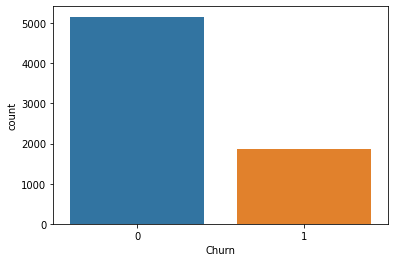

In [16]:
sns.countplot(x = 'Churn', data=df)
plt.show
print('Total Churn = {}'.format(df.Churn.value_counts().sum()))
print(df.Churn.value_counts())

### Do Over-Sampling to balance the target value

In [17]:
from imblearn.over_sampling import SMOTE

X = df.loc[:, df.columns != 'Churn']
y = df.loc[:, df.columns == 'Churn']

os = SMOTE(random_state = 0)

columns = X.columns
os_data_X, os_data_y = os.fit_resample(X, y)

os_data_X = pd.DataFrame(data = os_data_X, columns = columns )
os_data_y = pd.DataFrame(data = os_data_y, columns = ['Churn'])

print("length of oversampled data is ", len(os_data_X))
print("Number of no churn in oversampled data", len(os_data_y[os_data_y['Churn'] == 0]))
print("Number of churn", len(os_data_y[os_data_y['Churn'] == 1]))
print("Proportion of no churn data in oversampled data is ", len(os_data_y[os_data_y['Churn'] == 0]) / len(os_data_X))
print("Proportion of churn data in oversampled data is ", len(os_data_y[os_data_y['Churn'] == 1]) / len(os_data_X))

length of oversampled data is  10326
Number of no churn in oversampled data 5163
Number of churn 5163
Proportion of no churn data in oversampled data is  0.5
Proportion of churn data in oversampled data is  0.5


Total Churn = 10326
0    5163
1    5163
Name: Churn, dtype: int64


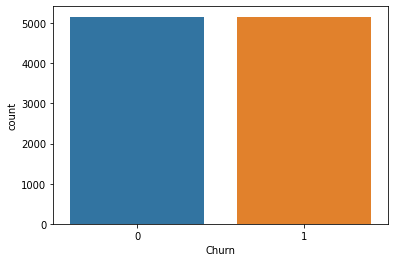

In [18]:
sns.countplot(x = 'Churn', data=os_data_y)
plt.show
print('Total Churn = {}'.format(os_data_y.Churn.value_counts().sum()))
print(os_data_y.Churn.value_counts())

### Do feature selection 

In [19]:
df_vars = df.columns.values.tolist()

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

rfe = RFE(estimator = DecisionTreeClassifier(), n_features_to_select=30)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True False  True  True  True  True  True  True  True
  True False  True False  True False  True  True False  True  True False
 False False  True  True  True False False  True False  True  True  True
  True  True  True  True  True]
[ 1  1  1  1  7  1  1  1  1  1  1  1  1  6  1  8  1 11  1  1 12  1  1 10
  4  3  1  1  1  9  2  1  5  1  1  1  1  1  1  1  1]


#### Keep selected feature

In [20]:
pp = []
for i in range(len(os_data_X.columns)):
    if rfe.support_[i] == True:
        pp.append(os_data_X.columns[i])
pp

['SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Female',
 'gender_Male',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'OnlineSecurity_No',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingMovies_No',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

### Explore data with statistical tests

In [21]:
import statsmodels.api as sm

X = os_data_X[pp]
y = os_data_y['Churn']

logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.321775
         Iterations 10
                                     Results: Logit
Model:                      Logit                    Pseudo R-squared:         0.536    
Dependent Variable:         Churn                    AIC:                      6705.2955
Date:                       2023-02-20 07:14         BIC:                      6922.5681
No. Observations:           10326                    Log-Likelihood:           -3322.6  
Df Model:                   29                       LL-Null:                  -7157.4  
Df Residuals:               10296                    LLR p-value:              0.0000   
Converged:                  1.0000                   Scale:                    1.0000   
No. Iterations:             10.0000                                                     
----------------------------------------------------------------------------------------
                                         Coe

#### Drop some features

In [22]:
for i in range (len(X.columns)):
    if result.pvalues[i] > 0.05:
        todel = X.columns[i]
        pp.remove(todel)

In [23]:
pp

['Dependents',
 'tenure',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'gender_Female',
 'gender_Male',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingMovies_No',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [24]:
X = os_data_X[pp]
y = os_data_y['Churn']

logit_model = sm.Logit(y,X)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.321885
         Iterations 10
                                     Results: Logit
Model:                      Logit                    Pseudo R-squared:         0.536    
Dependent Variable:         Churn                    AIC:                      6703.5708
Date:                       2023-02-20 06:30         BIC:                      6906.3586
No. Observations:           10326                    Log-Likelihood:           -3323.8  
Df Model:                   27                       LL-Null:                  -7157.4  
Df Residuals:               10298                    LLR p-value:              0.0000   
Converged:                  1.0000                   Scale:                    1.0000   
No. Iterations:             10.0000                                                     
----------------------------------------------------------------------------------------
                                         Coe

### Fit data into model

#### Decision tree

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)
print(y_pred)

print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

[0 0 0 ... 1 0 1]
Accuracy Score: 0.8118140735958683
[[1218  324]
 [ 259 1297]]


#### LogisticRegression

In [26]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='liblinear', penalty='l1')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print(y_pred)

print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

[0 0 0 ... 0 0 1]
Accuracy Score: 0.8608779857972886
[[1338  204]
 [ 227 1329]]


In [27]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86
